In [1]:
import numpy as np
# from scipy.sparse import coo_matrix
# import gzip
import pickle
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# import itertools
import torch
# import torch_geometric as tg
from torch_geometric.data import Data


In [2]:
full_addr_im = pd.read_csv('Graph - Sheet3.csv', header=None)[1:].drop(columns = [0]).astype(int)
full_addr_im = full_addr_im.to_numpy()
np.savetxt("full_addr_im.csv", full_addr_im,fmt="%d", delimiter=",")
full_addr_im

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 1, 0, 3, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [3]:
full_addr_am = np.dot(full_addr_im, full_addr_im.T)
full_addr_am = (full_addr_am > 0).astype(int) - np.eye(full_addr_am.shape[0]).astype(int)
np.savetxt("full_addr_am.csv", full_addr_am,fmt="%d", delimiter=",")
full_addr_am

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

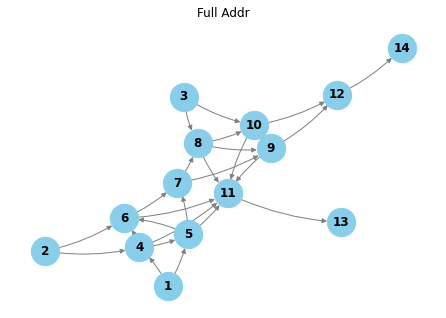

<Figure size 720x720 with 0 Axes>

In [4]:
G = nx.from_numpy_matrix(np.array(full_addr_am))

nodes_label = {}
for i in range(full_addr_am.shape[0]):
    nodes_label[i] = i+1
G = nx.relabel_nodes(G, nodes_label) 

nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=12, font_weight='bold', width=1, edge_color='gray', arrows=True, connectionstyle='arc3,rad=0.1')
plt.title('Full Addr')
plt.figure(figsize=(10,10))
plt.show()

In [5]:
# Convert the adjacency matrix to a torch tensor
adj_tensor = torch.tensor(full_addr_am)

# Extract non-zero indices from the adjacency matrix
edge_indices = torch.nonzero(adj_tensor, as_tuple=False).t().contiguous()

# Create the torch_geometric data object
data = Data(edge_index=edge_indices)

# Optionally, you can also assign node features (x) if available
# data.x = torch.tensor(your_node_features)

# Save the torch_geometric data object to a pickle file
with open('full_addr_data.pkl', 'wb') as f:
    pickle.dump(data, f)


In [6]:
multi_bit_adr_im = pd.read_csv('Graph - multi_im.csv', header=None)[1:].drop(columns=[0])
multi_bit_adr_im = multi_bit_adr_im.to_numpy()
np.savetxt("multi_bit_adr_im.csv", multi_bit_adr_im,fmt="%d", delimiter=",")

In [7]:
multi_bit_adr_am = np.dot(multi_bit_adr_im, multi_bit_adr_im.T)
multi_bit_adr_am = (multi_bit_adr_am > 0).astype(int) - np.eye(multi_bit_adr_am.shape[0]).astype(int)
np.savetxt("multi_bit_adr_am.csv", multi_bit_adr_am,fmt="%d", delimiter=",")
multi_bit_adr_am

array([[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

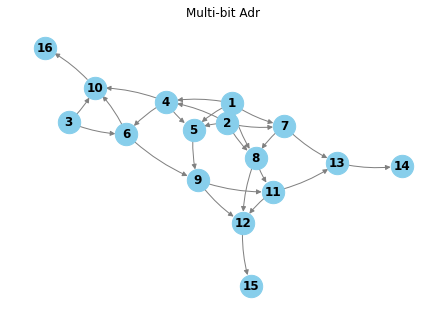

In [8]:
G = nx.from_numpy_matrix(np.array(multi_bit_adr_am))

nodes_label = {}
for i in range(multi_bit_adr_am.shape[0]):
    nodes_label[i] = i+1
G = nx.relabel_nodes(G, nodes_label) 

nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_weight='bold', width=1, edge_color='gray', arrows=True, connectionstyle='arc3,rad=0.1')
plt.title('Multi-bit Adr')
plt.show()

In [9]:
# Convert the adjacency matrix to a torch tensor
adj_tensor = torch.tensor(multi_bit_adr_am)

# Extract non-zero indices from the adjacency matrix
edge_indices = torch.nonzero(adj_tensor, as_tuple=False).t().contiguous()

# Create the torch_geometric data object
data = Data(edge_index=edge_indices)

# Optionally, you can also assign node features (x) if available
# data.x = torch.tensor(your_node_features)

# Save the torch_geometric data object to a pickle file
with open('multi_bit_adr.pkl', 'wb') as f:
    pickle.dump(data, f)

### Below are Task 2 Brainstorming code.

{('x', 'a'): 3.0,
 ('x', 'b'): 1.0,
 ('a', 'c'): 3.0,
 ('b', 'c'): 5.0,
 ('b', 'd'): 4.0,
 ('c', 'y'): 2.0,
 ('d', 'e'): 2.0,
 ('e', 'y'): 3.0}

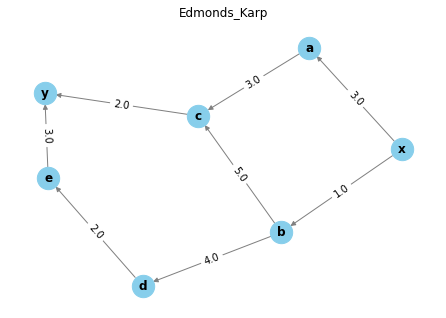

<Figure size 720x720 with 0 Axes>

{('x', 'a'): 3.0,
 ('x', 'b'): 1.0,
 ('a', 'x'): 0,
 ('a', 'c'): 3.0,
 ('b', 'x'): 0,
 ('b', 'c'): 5.0,
 ('b', 'd'): 4.0,
 ('c', 'a'): 0,
 ('c', 'b'): 0,
 ('c', 'y'): 2.0,
 ('d', 'b'): 0,
 ('d', 'e'): 2.0,
 ('e', 'd'): 0,
 ('e', 'y'): 3.0,
 ('y', 'c'): 0,
 ('y', 'e'): 0}

3.0

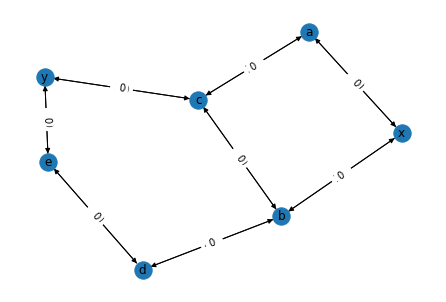

In [10]:
from networkx.algorithms.flow import edmonds_karp
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)

R = edmonds_karp(G, "x", "y")

pos = nx.spring_layout(G)
G_labels = nx.get_edge_attributes(G,'capacity')
display(G_labels)
nx.draw(G, pos,  with_labels = True, node_color='skyblue', node_size=500, font_size=12, font_weight='bold', width=1, edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=G_labels)

plt.title('Edmonds_Karp')
plt.figure(figsize=(10,10))
plt.show()

R_1 = nx.MultiDiGraph(R, directed=True)
nx.draw(R_1, pos, with_labels = True)
R_labels = nx.get_edge_attributes(R,'capacity')
display(R_labels)
nx.draw_networkx_edge_labels(R, pos, edge_labels=R_labels)

flow_value = nx.maximum_flow_value(G, "x", "y")
flow_value

Maximum Flow: 1


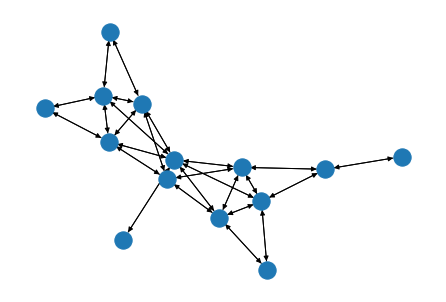

In [11]:
import networkx as nx

def edmonds_karp_adjacency_matrix(adj_matrix, source, sink):
    """
    Compute maximum flow using Edmonds-Karp algorithm on an adjacency matrix representation of a graph.
    
    Parameters:
        adj_matrix (list of lists): Adjacency matrix representing the graph.
        source (int): Source node.
        sink (int): Sink (target) node.
        
    Returns:
        max_flow_value (int): Maximum flow value.
    """
    # Convert adjacency matrix to a NetworkX graph
    graph = nx.DiGraph()
    num_nodes = len(adj_matrix)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i][j] > 0:
                graph.add_edge(i, j, capacity=adj_matrix[i][j])
    
    nx.draw(graph)
    # Compute maximum flow using Edmonds-Karp algorithm
    max_flow_value, _ = nx.maximum_flow(graph, source, sink)
    
    return max_flow_value

# Example usage:
# Define an adjacency matrix representing the graph with capacities
adj_matrix = full_addr_am

source_node = 0
sink_node = 13

# Compute maximum flow using Edmonds-Karp algorithm on the adjacency matrix
max_flow_value = edmonds_karp_adjacency_matrix(adj_matrix, source_node, sink_node)

print("Maximum Flow:", max_flow_value)



In [12]:
"""
Edmonds-Karp algorithm for maximum flow problems.
"""

import networkx as nx
from networkx.algorithms.flow.utils import build_residual_network

__all__ = ["edmonds_karp"]


def edmonds_karp_core(R, s, t, cutoff):
    """Implementation of the Edmonds-Karp algorithm."""
    R_nodes = R.nodes
    R_pred = R.pred
    R_succ = R.succ

    inf = R.graph["inf"]

    def augment(path):
        """Augment flow along a path from s to t."""
        # Determine the path residual capacity.
        flow = inf
        it = iter(path)
        u = next(it)
        for v in it:
            attr = R_succ[u][v]
            flow = min(flow, attr["capacity"] - attr["flow"])
            u = v
        if flow * 2 > inf:
            raise nx.NetworkXUnbounded("Infinite capacity path, flow unbounded above.")
        # Augment flow along the path.
        it = iter(path)
        u = next(it)
        for v in it:
            R_succ[u][v]["flow"] += flow
            R_succ[v][u]["flow"] -= flow
            u = v
        return flow

    def bidirectional_bfs():
        """Bidirectional breadth-first search for an augmenting path."""
        pred = {s: None}
        q_s = [s]
        succ = {t: None}
        q_t = [t]
        while True:
            q = []
            if len(q_s) <= len(q_t):
                for u in q_s:
                    for v, attr in R_succ[u].items():
                        if v not in pred and attr["flow"] < attr["capacity"]:
                            pred[v] = u
                            if v in succ:
                                return v, pred, succ
                            q.append(v)
                if not q:
                    return None, None, None
                q_s = q
            else:
                for u in q_t:
                    for v, attr in R_pred[u].items():
                        if v not in succ and attr["flow"] < attr["capacity"]:
                            succ[v] = u
                            if v in pred:
                                return v, pred, succ
                            q.append(v)
                if not q:
                    return None, None, None
                q_t = q

    # Look for shortest augmenting paths using breadth-first search.
    flow_value = 0
    while flow_value < cutoff:
        v, pred, succ = bidirectional_bfs()
        if pred is None:
            break
        path = [v]
        # Trace a path from s to v.
        u = v
        while u != s:
            u = pred[u]
            path.append(u)
        path.reverse()
        # Trace a path from v to t.
        u = v
        while u != t:
            u = succ[u]
            path.append(u)
        flow_value += augment(path)

    return flow_value


def edmonds_karp_impl(G, s, t, capacity, residual, cutoff):
    """Implementation of the Edmonds-Karp algorithm."""
    if s not in G:
        raise nx.NetworkXError(f"node {str(s)} not in graph")
    if t not in G:
        raise nx.NetworkXError(f"node {str(t)} not in graph")
    if s == t:
        raise nx.NetworkXError("source and sink are the same node")

    if residual is None:
        R = build_residual_network(G, capacity)
    else:
        R = residual

    # Initialize/reset the residual network.
    for u in R:
        for e in R[u].values():
            e["flow"] = 0

    if cutoff is None:
        cutoff = float("inf")
    R.graph["flow_value"] = edmonds_karp_core(R, s, t, cutoff)

    return R

In [13]:
def edmonds_karp(
    G, s, t, capacity="capacity", residual=None, value_only=False, cutoff=None
):
    """Find a maximum single-commodity flow using the Edmonds-Karp algorithm.

    This function returns the residual network resulting after computing
    the maximum flow. See below for details about the conventions
    NetworkX uses for defining residual networks.

    This algorithm has a running time of $O(n m^2)$ for $n$ nodes and $m$
    edges.


    Parameters
    ----------
    G : NetworkX graph
        Edges of the graph are expected to have an attribute called
        'capacity'. If this attribute is not present, the edge is
        considered to have infinite capacity.

    s : node
        Source node for the flow.

    t : node
        Sink node for the flow.

    capacity : string
        Edges of the graph G are expected to have an attribute capacity
        that indicates how much flow the edge can support. If this
        attribute is not present, the edge is considered to have
        infinite capacity. Default value: 'capacity'.

    residual : NetworkX graph
        Residual network on which the algorithm is to be executed. If None, a
        new residual network is created. Default value: None.

    value_only : bool
        If True compute only the value of the maximum flow. This parameter
        will be ignored by this algorithm because it is not applicable.

    cutoff : integer, float
        If specified, the algorithm will terminate when the flow value reaches
        or exceeds the cutoff. In this case, it may be unable to immediately
        determine a minimum cut. Default value: None.

    Returns
    -------
    R : NetworkX DiGraph
        Residual network after computing the maximum flow.

    Raises
    ------
    NetworkXError
        The algorithm does not support MultiGraph and MultiDiGraph. If
        the input graph is an instance of one of these two classes, a
        NetworkXError is raised.

    NetworkXUnbounded
        If the graph has a path of infinite capacity, the value of a
        feasible flow on the graph is unbounded above and the function
        raises a NetworkXUnbounded.

    See also
    --------
    :meth:`maximum_flow`
    :meth:`minimum_cut`
    :meth:`preflow_push`
    :meth:`shortest_augmenting_path`

    Notes
    -----
    The residual network :samp:`R` from an input graph :samp:`G` has the
    same nodes as :samp:`G`. :samp:`R` is a DiGraph that contains a pair
    of edges :samp:`(u, v)` and :samp:`(v, u)` iff :samp:`(u, v)` is not a
    self-loop, and at least one of :samp:`(u, v)` and :samp:`(v, u)` exists
    in :samp:`G`.

    For each edge :samp:`(u, v)` in :samp:`R`, :samp:`R[u][v]['capacity']`
    is equal to the capacity of :samp:`(u, v)` in :samp:`G` if it exists
    in :samp:`G` or zero otherwise. If the capacity is infinite,
    :samp:`R[u][v]['capacity']` will have a high arbitrary finite value
    that does not affect the solution of the problem. This value is stored in
    :samp:`R.graph['inf']`. For each edge :samp:`(u, v)` in :samp:`R`,
    :samp:`R[u][v]['flow']` represents the flow function of :samp:`(u, v)` and
    satisfies :samp:`R[u][v]['flow'] == -R[v][u]['flow']`.

    The flow value, defined as the total flow into :samp:`t`, the sink, is
    stored in :samp:`R.graph['flow_value']`. If :samp:`cutoff` is not
    specified, reachability to :samp:`t` using only edges :samp:`(u, v)` such
    that :samp:`R[u][v]['flow'] < R[u][v]['capacity']` induces a minimum
    :samp:`s`-:samp:`t` cut.

    Examples
    --------
    >>> from networkx.algorithms.flow import edmonds_karp

    The functions that implement flow algorithms and output a residual
    network, such as this one, are not imported to the base NetworkX
    namespace, so you have to explicitly import them from the flow package.

    >>> G = nx.DiGraph()
    >>> G.add_edge("x", "a", capacity=3.0)
    >>> G.add_edge("x", "b", capacity=1.0)
    >>> G.add_edge("a", "c", capacity=3.0)
    >>> G.add_edge("b", "c", capacity=5.0)
    >>> G.add_edge("b", "d", capacity=4.0)
    >>> G.add_edge("d", "e", capacity=2.0)
    >>> G.add_edge("c", "y", capacity=2.0)
    >>> G.add_edge("e", "y", capacity=3.0)
    >>> R = edmonds_karp(G, "x", "y")
    >>> flow_value = nx.maximum_flow_value(G, "x", "y")
    >>> flow_value
    3.0
    >>> flow_value == R.graph["flow_value"]
    True

    """
    R = edmonds_karp_impl(G, s, t, capacity, residual, cutoff)
    R.graph["algorithm"] = "edmonds_karp"
    return R

In [14]:
# def multilayered_graph(G,*subset_sizes):
#     extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
#     layers = [range(start, end) for start, end in extents]
#     # G = nx.from_numpy_matrix(full_addr.values)
#     for i, layer in enumerate(layers):
#         G.add_nodes_from(layer, layer=i)
#     return G

# nodes_label = {}
# for i in range(full_addr_am.shape[0]):
#     nodes_label[i] = i+1

# subset_sizes = [3,9,2]

# G = multilayered_graph(nx.from_numpy_matrix(full_addr_am),*subset_sizes)
# G = nx.relabel_nodes(G, nodes_label)
# # color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
# pos = nx.multipartite_layout(G, subset_key="layer")
# plt.figure(figsize=(5,10))
# nx.draw(G, pos, with_labels=True)
# plt.axis("equal")
# plt.title('Full Addr')
# plt.show()

In [15]:
# # Opening JSON file
# with gzip.open('RosettaStone-GraphData-2023-09-22/superblue1/superblue1.json.gz','rb') as f:
#     design = json.loads(f.read().decode('utf-8'))

# design

In [16]:
# Opening JSON file
f = open('small_circuit_data/cells.json')
 
# returns JSON object as 
# a dictionary
cells_data = json.load(f)
cells_data

[{'name': 'nand',
  'id': 0,
  'width': 2000,
  'height': 3000,
  'terms': [{'name': 'a', 'id': 0, 'dir': 0, 'xloc': 666, 'yloc': 0},
   {'name': 'b', 'id': 1, 'dir': 0, 'xloc': 1333, 'yloc': 0},
   {'name': 'out', 'id': 3, 'dir': 1, 'xloc': 1000, 'yloc': 3000}]},
 {'name': 'and',
  'id': 1,
  'width': 4000,
  'height': 3500,
  'terms': [{'name': 'a', 'id': 4, 'dir': 0, 'xloc': 1333, 'yloc': 0},
   {'name': 'b', 'id': 5, 'dir': 0, 'xloc': 2666, 'yloc': 0},
   {'name': 'out', 'id': 6, 'dir': 1, 'xloc': 2000, 'yloc': 3500}]},
 {'name': 'or',
  'id': 2,
  'width': 3750,
  'height': 3750,
  'terms': [{'name': 'a', 'id': 7, 'dir': 0, 'xloc': 1250, 'yloc': 0},
   {'name': 'b', 'id': 8, 'dir': 0, 'xloc': 2500, 'yloc': 0},
   {'name': 'out', 'id': 9, 'dir': 1, 'xloc': 1875, 'yloc': 3750}]},
 {'name': 'xor',
  'id': 3,
  'width': 8000,
  'height': 12000,
  'terms': [{'name': 'a', 'id': 10, 'dir': 0, 'xloc': 2666, 'yloc': 0},
   {'name': 'b', 'id': 11, 'dir': 0, 'xloc': 5333, 'yloc': 0},
   {'na

In [17]:
# Opening JSON file
f = open('small_circuit_data/full_addr.json')
 
# returns JSON object as 
# a dictionary
full_addr_data = json.load(f)
instances = full_addr_data['instances']
nets = full_addr_data['nets']
full_addr_data

{'instances': [{'name': 'INPUT_a',
   'id': 0,
   'xloc': -1,
   'yloc': -1,
   'cell': 6,
   'orient': 3},
  {'name': 'INPUT_b', 'id': 1, 'xloc': -1, 'yloc': -1, 'cell': 7, 'orient': 2},
  {'name': 'INPUT_carry',
   'id': 2,
   'xloc': -1,
   'yloc': -1,
   'cell': 8,
   'orient': 1},
  {'name': 'OUTPUT', 'id': 3, 'xloc': -1, 'yloc': -1, 'cell': 5, 'orient': 2},
  {'name': 'OUTPUT', 'id': 4, 'xloc': -1, 'yloc': -1, 'cell': 5, 'orient': 1},
  {'name': 'nand', 'id': 5, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 1},
  {'name': 'nand', 'id': 6, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 6},
  {'name': 'nand', 'id': 7, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 4},
  {'name': 'nand', 'id': 8, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 0},
  {'name': 'nand', 'id': 9, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 0},
  {'name': 'nand', 'id': 10, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 4},
  {'name': 'nand', 'id': 11, 'xloc': -1, 'yloc': -1, 'cell': 0, 'orient': 4},
  {'name': 'na

In [18]:
# num_nets = len(full_addr_data['nets'])
# num_inst = len(full_addr_data['instances'])
# tmp = np.zeros((num_inst,num_nets))
# for i in range(num_nets):
#     for j in range(num_inst):
#         print(tmp)
#         tmp[j][i] = cells_data[full_addr_data['instances'][j]['cell']]['terms'][i-1]['id']



In [19]:
# cells_data[full_addr_data['instances'][1]['cell']]['terms'][0]

In [20]:
# full_addr_im[1][1]

In [21]:
# full_addr_im